In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bUv1JpJ6R6wJtZg1MXpN")
project = rf.workspace("dinoai").project("dinoai")
dataset = project.version(3).download("yolov8")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/DinoAI-3/data.yaml epochs=100 imgsz=640

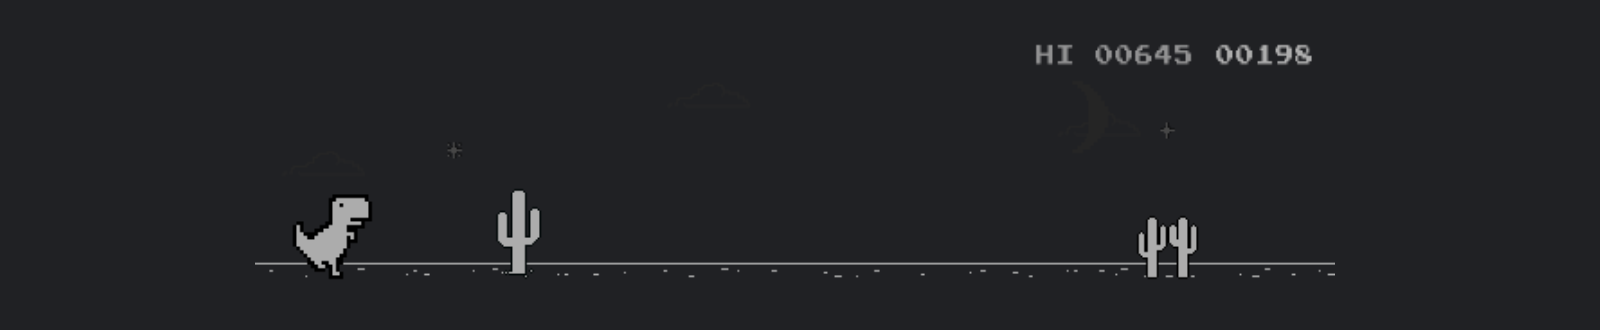


image 1/1 /content/drive/MyDrive/data/up/122.png: 160x640 1 dinos, 2 trees, 8.7ms
Speed: 1.1ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 160, 640)


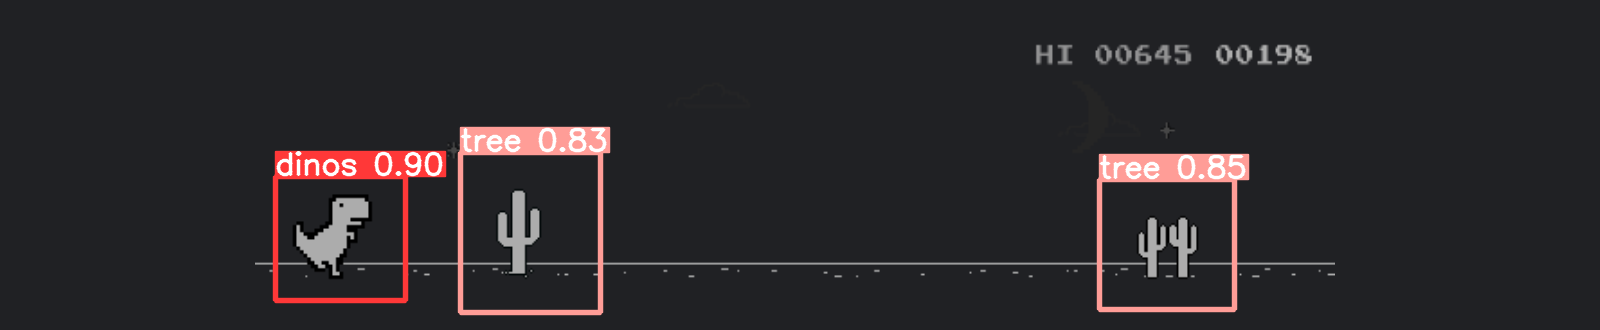

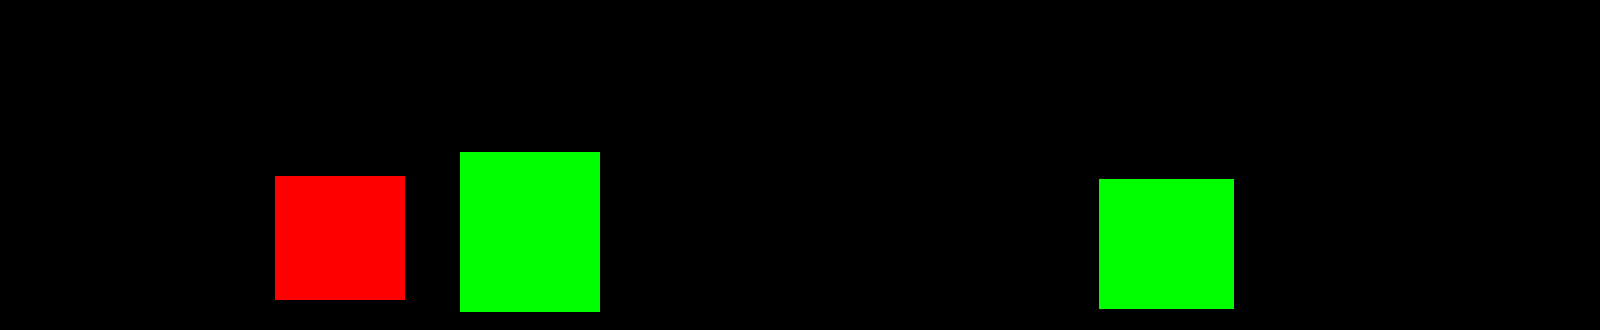

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np



cv2_imshow(cv2.imread('/content/drive/MyDrive/data/up/122.png'))

model = YOLO('/content/drive/MyDrive/data/best.pt')
results = model('/content/drive/MyDrive/data/up/122.png')

cv2_imshow(results[0].plot())

img = np.zeros_like(results[0].plot())
for result in results:
    boxes = result.boxes.cpu().numpy()
    for i, box in enumerate(boxes):
        r = box.xyxy[0].astype(int)
        label = box.cls[0]
        color = [0, 0, 255] if label == 0 else [0, 255, 0]
        img[r[1]:r[3], r[0]:r[2]] = color

print('')
cv2_imshow(img)

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import os

model = YOLO('/content/drive/MyDrive/data/best.pt')

# Specify the paths for 'none' and 'up' folders
none_folder = '/content/drive/MyDrive/data/none'
up_folder = '/content/drive/MyDrive/data/up'

# Iterate through the files in the 'none' folder
for none_file in os.listdir(none_folder):
    none_path = os.path.join(none_folder, none_file)
    results = model(none_path)

    img = np.zeros_like(results[0].plot())
    for result in results:
        boxes = result.boxes.cpu().numpy()
        for i, box in enumerate(boxes):
            r = box.xyxy[0].astype(int)
            label = box.cls[0]
            color = [0, 0, 255] if label == 0 else [0, 255, 0]
            img[r[1]:r[3], r[0]:r[2]] = color

    save_path = f'/content/seg-data/none/{none_file}'
    cv2.imwrite(save_path, img)


# Iterate through the files in the 'up' folder
for up_file in os.listdir(up_folder):
    up_path = os.path.join(up_folder, up_file)
    results = model(up_path)

    img = np.zeros_like(results[0].plot())
    for result in results:
        boxes = result.boxes.cpu().numpy()
        for i, box in enumerate(boxes):
            r = box.xyxy[0].astype(int)
            label = box.cls[0]
            color = [0, 0, 255] if label == 0 else [0, 255, 0]
            img[r[1]:r[3], r[0]:r[2]] = color

    save_path = f'/content/seg-data/up/{up_file}'
    cv2.imwrite(save_path, img)



image 1/1 /content/drive/MyDrive/data/none/5.png: 160x640 1 dinos, 1 tree, 105.0ms
Speed: 10.0ms preprocess, 105.0ms inference, 35.4ms postprocess per image at shape (1, 3, 160, 640)

image 1/1 /content/drive/MyDrive/data/none/8.png: 160x640 1 dinos, 2 trees, 8.2ms
Speed: 1.1ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 160, 640)

image 1/1 /content/drive/MyDrive/data/none/1.png: 160x640 1 dinos, 2 trees, 8.2ms
Speed: 1.1ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 160, 640)

image 1/1 /content/drive/MyDrive/data/none/9.png: 160x640 2 dinoss, 2 trees, 8.2ms
Speed: 1.1ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 160, 640)

image 1/1 /content/drive/MyDrive/data/none/7.png: 160x640 1 dinos, 2 trees, 8.4ms
Speed: 1.2ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 160, 640)

image 1/1 /content/drive/MyDrive/data/none/3.png: 160x640 1 dinos, 1 tree, 9.8ms
Speed: 1.0ms prep

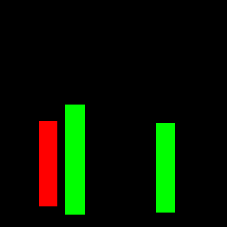

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/seg-data/up/122.png')
resized_img = cv2.resize(img, (227, 227))
cv2_imshow(resized_img)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the AlexNet model
def alexnet_model(input_shape):
    model = models.Sequential()

    # Layer 1
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Layer 2
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Layer 3
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 4
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 5
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Flatten the output for the fully connected layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))

    # Output layer for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Specify the input shape based on your dataset
input_shape = (224, 224, 3)  # Adjust according to your image dimensions

# Create the AlexNet model
model = alexnet_model(input_shape)

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
!rm -rf /content/seg-data/.ipynb_checkpoints

In [ ]:
import os
import cv2
import numpy as np
import torch

mapper = {'none':0, 'up':1}
count = 0
data_dir = '/content/seg-data'
X = []
Y = []
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name
        print(label)
        for file_name in os.listdir(folder_path):
          try:
            file_path = os.path.join(folder_path, file_name)
            image = cv2.imread(file_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            image = image.astype(np.float32) / 255.0
            X.append(image)
            Y.append(mapper[label])
            count += 1
          except:
            continue


up
none


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1, random_state=42)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print(x_train)

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
14/14 [==============================] - 2s 101ms/step - loss: nan - accuracy: 0.9234 - val_loss: nan - val_accuracy: 0.8542
Epoch 2/10
14/14 [==============================] - 1s 105ms/step - loss: nan - accuracy: 0.9234 - val_loss: nan - val_accuracy: 0.8542
Epoch 3/10
14/14 [==============================] - 2s 125ms/step - loss: nan - accuracy: 0.9234 - val_loss: nan - val_accuracy: 0.8542
Epoch 4/10
14/14 [==============================] - 2s 115ms/step - loss: nan - accuracy: 0.9234 - val_loss: nan - val_accuracy: 0.8542
Epoch 5/10
14/14 [==============================] - 2s 123ms/step - loss: nan - accuracy: 0.9234 - val_loss: nan - val_accuracy: 0.8542
Epoch 6/10
14/14 [==============================] - 1s 93ms/step - loss: nan - accuracy: 0.9234 - val_loss: nan - val_accuracy: 0.8542
Epoch 7/10
14/14 [==============================] - 1s 93ms/step - loss: nan - accuracy: 0.9234 - val_loss: nan - val_accuracy: 0.8542
Epoch 8/10
14/14 [==============================] 